In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
train = pd.read_csv("train.csv", names=['Store','Dept','Date','weeklySales','isHoliday'],sep=',', header=0)
features = pd.read_csv("features.csv",sep=',', header=0,
                       names=['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4',
                              'MarkDown5','CPI','Unemployment','IsHoliday']).drop(columns=['IsHoliday'])
stores = pd.read_csv("stores.csv", names=['Store','Type','Size'],sep=',', header=0)
dataset = train.merge(stores, how='left').merge(features, how='left')

In [4]:
import datetime
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['month_year'] = pd.to_datetime(dataset['Date']).dt.to_period('M')
dataset['Index'] = dataset['Store'].astype(str) + '_' + dataset['Dept'].astype(str)

In [4]:
dataset

,Store,Dept,Date,weeklySales,isHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,month_year,Index
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,2010-02,1_1
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,2010-02,1_1
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,2010-02,1_1
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,2010-02,1_1
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,2010-03,1_1
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,2010,3,2010-03,1_1
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,2010,3,2010-03,1_1
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,2010,3,2010-03,1_1
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,2010,4,2010-04,1_1
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,2010,4,2010-04,1_1


In [5]:
def group_dataset(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['weeklySales'])
    plt.ylabel('weeklySales')
    plt.xlabel(column)

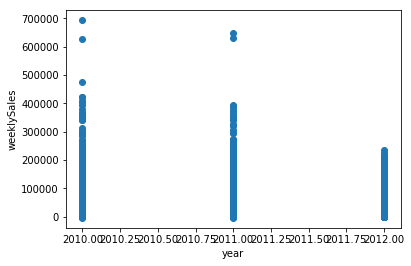

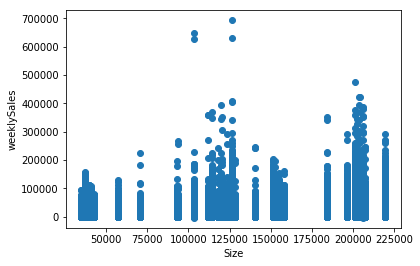

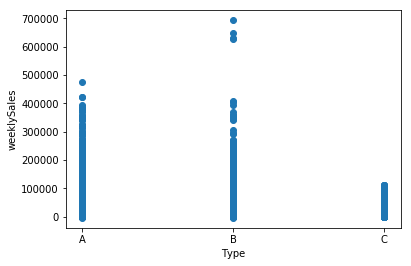

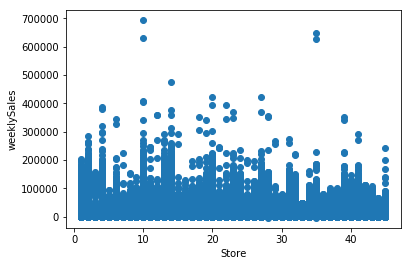

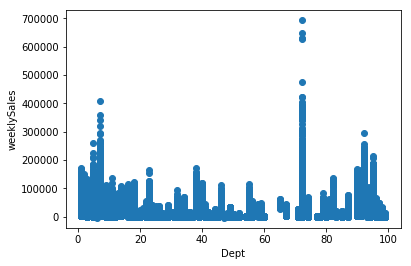

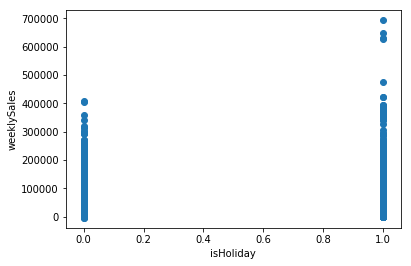

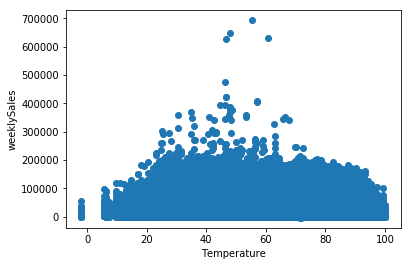

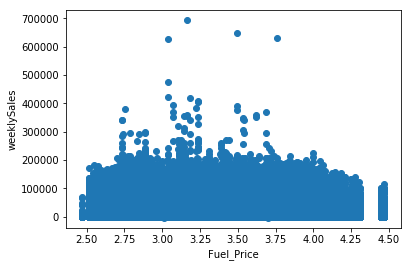

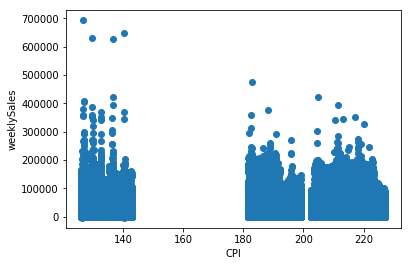

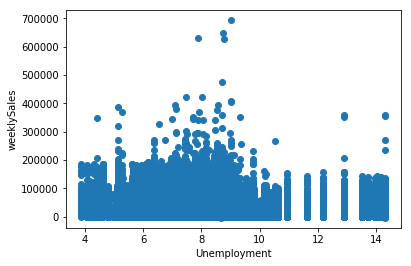

In [6]:
group_dataset(dataset, 'year')
group_dataset(dataset, 'Size')
group_dataset(dataset, 'Type')
group_dataset(dataset, 'Store')
group_dataset(dataset, 'Dept')
group_dataset(dataset, 'isHoliday')
group_dataset(dataset, 'Temperature')
group_dataset(dataset, 'Fuel_Price')
group_dataset(dataset, 'CPI')
group_dataset(dataset, 'Unemployment')

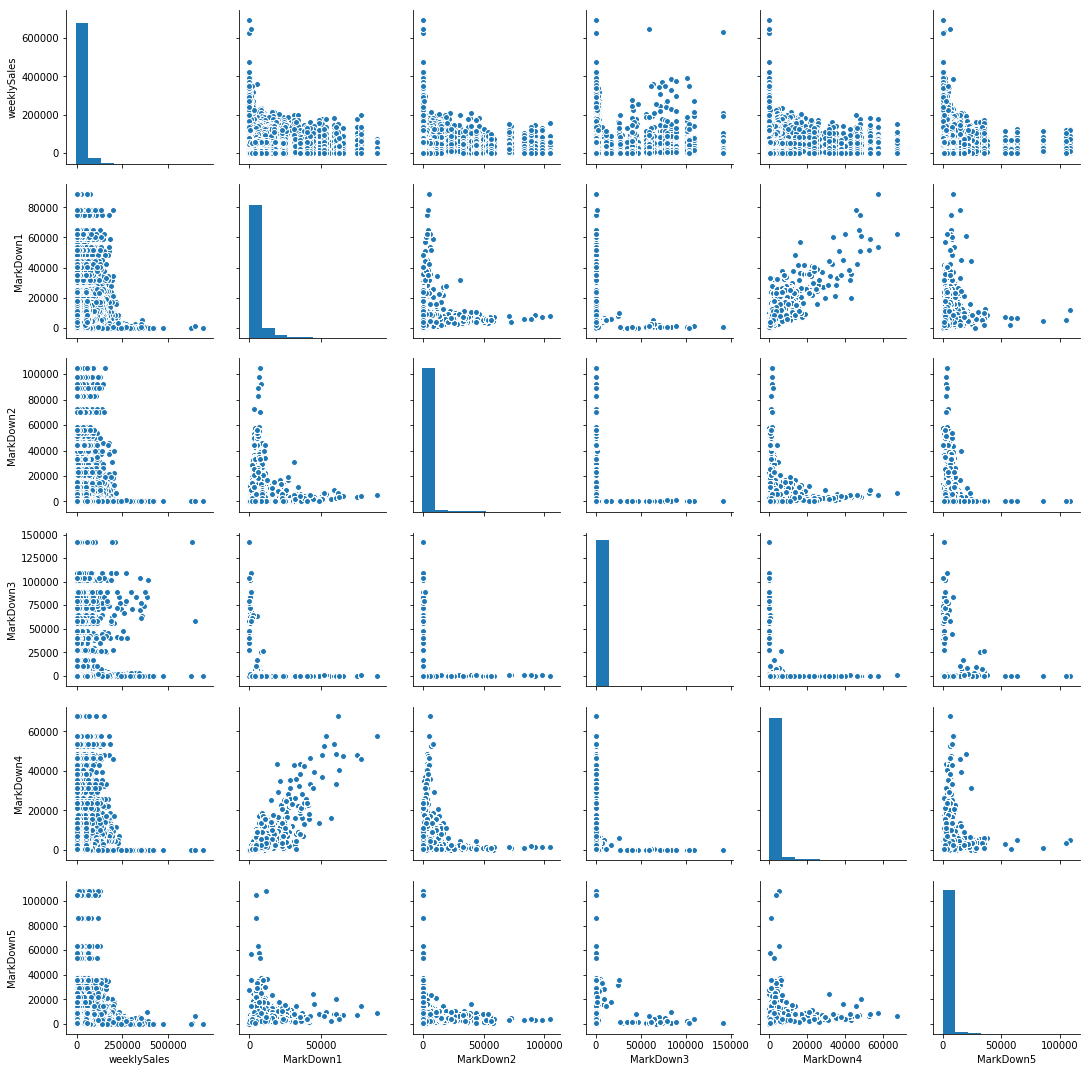

In [7]:
from seaborn import pairplot
pairplot(dataset.fillna(0), vars=['weeklySales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

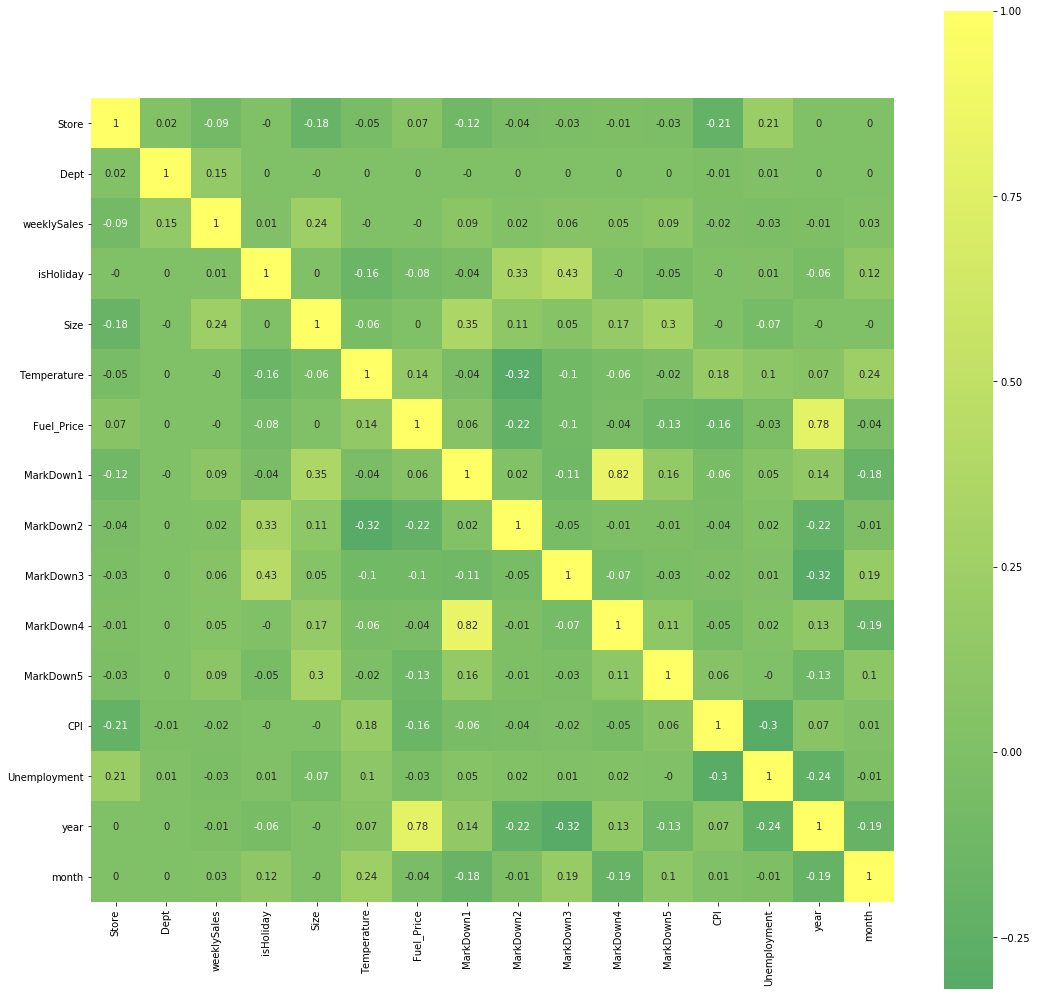

In [8]:
corr_matrix = dataset.corr().round(2)
fig, ax = plt.subplots(figsize=(18,18))
from seaborn import heatmap
heatmap(corr_matrix, annot=True, center=0, square=True, cmap="summer")

The correlation of weeklysales and other attributes are low, the highest two of attribites are Dept (correlation=0.15) and Size (correlation=0.24)

In [9]:
#Department
d_dept = dataset.groupby(['Dept'])['weeklySales'].sum()
d_dept.sort_values(ascending=False)[:10]

Dept
92    4.839433e+08
95    4.493202e+08
38    3.931181e+08
72    3.057252e+08
90    2.910685e+08
40    2.889360e+08
2     2.806112e+08
91    2.167817e+08
13    1.973216e+08
8     1.942808e+08
Name: weeklySales, dtype: float64

The most popular departents were no.92, no.95, no.38, no.72.

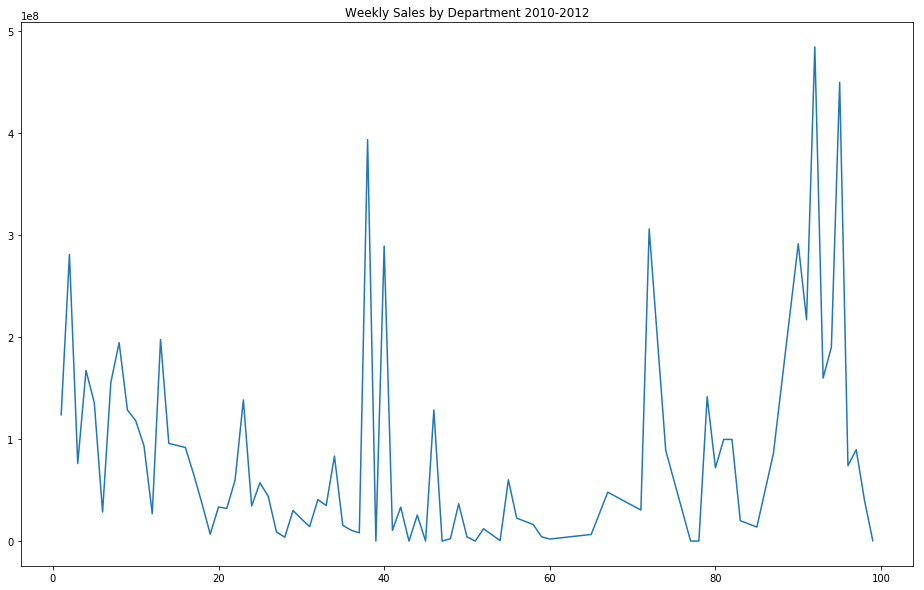

In [10]:
fig, ax = plt.subplots(figsize=(16,10))
plt.plot(d_dept)
plt.title("Weekly Sales by Department 2010-2012")
plt.show()

In [11]:
#Store Size
d_size = dataset.groupby(['Size'])['weeklySales'].sum()
d_size.sort_values(ascending=False)[:10]

Size
203819    4.006509e+08
203742    3.013978e+08
205863    2.995440e+08
200898    2.889999e+08
219622    2.865177e+08
202307    2.753824e+08
126512    2.716177e+08
204184    2.538559e+08
202505    2.237561e+08
151315    2.224028e+08
Name: weeklySales, dtype: float64

Stores with size over 20,000 were more popular than others. 

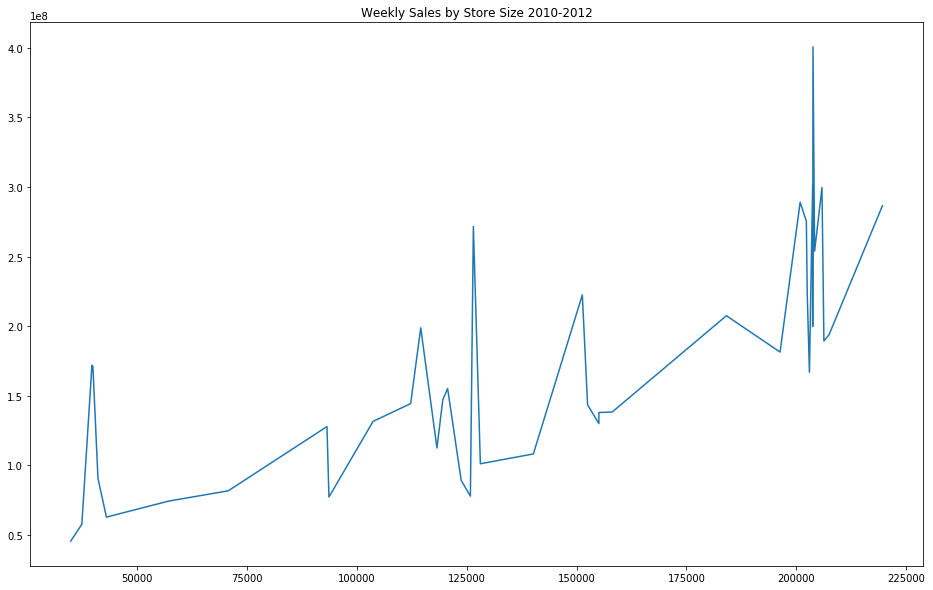

In [12]:
fig, ax = plt.subplots(figsize=(16,10))
plt.plot(d_size)
plt.title("Weekly Sales by Store Size 2010-2012")
plt.show()

In [13]:
month_year = pd.pivot_table(dataset, values='weeklySales', index='month', columns='year', aggfunc=sum)
month_year

year,2010,2011,2012
month,,,
1,NaN,1.637040e+08,1.688945e+08
2,1.903330e+08,1.863313e+08,1.920636e+08
3,1.819198e+08,1.793564e+08,2.315097e+08
4,2.314124e+08,2.265265e+08,1.889209e+08
5,1.867109e+08,1.816482e+08,1.887665e+08
6,1.922462e+08,1.897734e+08,2.406103e+08
7,2.325801e+08,2.299114e+08,1.875095e+08
8,1.876401e+08,1.885993e+08,2.368508e+08
9,1.772679e+08,2.208477e+08,1.806455e+08


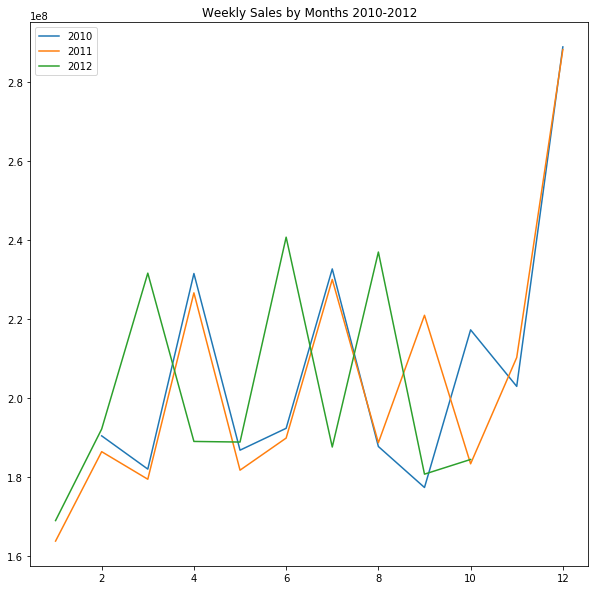

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(month_year)
plt.title("Weekly Sales by Months 2010-2012")
plt.legend(['2010','2011','2012'])
plt.show()

Patten is quite clear: low sales in beginning of year, Jan and Feb; flucuate during mid year; then boost at end of year, Nov and Dec

In [15]:
store_dep = pd.pivot_table(dataset, values='weeklySales', index='Index', columns='year', aggfunc=sum)
np.argsort(store_dep)
store_dep

year,2010,2011,2012
Index,,,
10_1,2073394.31,2108481.44,1527419.12
10_10,2285601.40,2498325.12,2095526.56
10_11,1622433.09,1717764.10,1366192.41
10_12,461435.68,457641.34,402694.65
10_13,3107360.72,3214937.42,2657968.51
10_14,1993316.72,2105513.43,1627553.05
10_16,1454832.21,1466187.24,1408144.64
10_17,1345449.97,1375997.10,1169094.35
10_18,856569.76,816909.64,243393.65


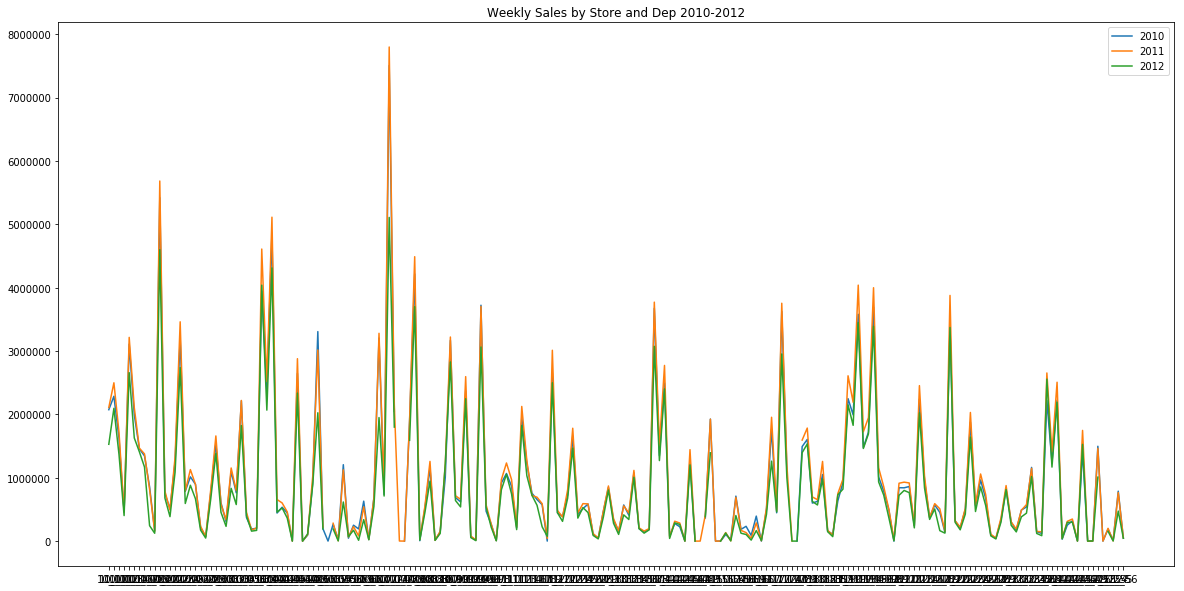

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(store_dep[:200]) #randomly select 200 entries
plt.title("Weekly Sales by Store and Dep 2010-2012")
plt.legend(['2010','2011','2012'])
plt.show()

Surprisely, each store_dep follows the same patterns with years.
Store_Dep will be the perfet attribute to predict model.

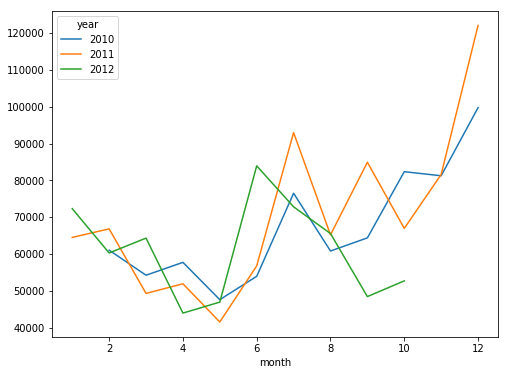

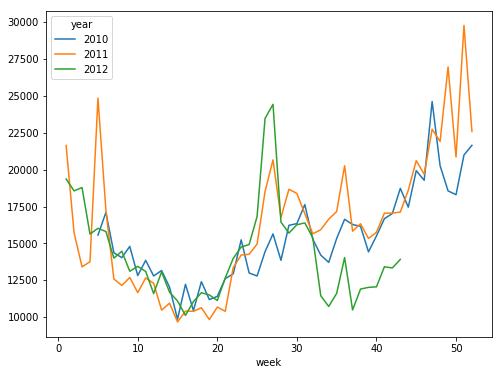

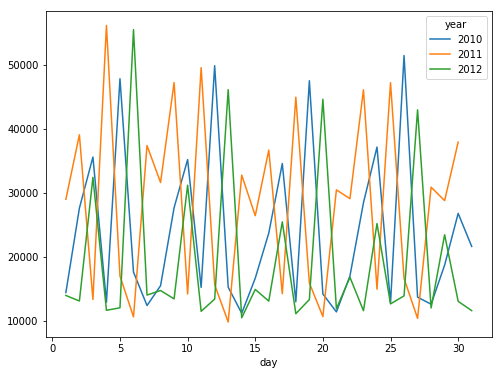

In [27]:
dataset['week'] = pd.DatetimeIndex(dataset['Date']).week
dataset['day'] = pd.DatetimeIndex(dataset['Date']).day
sd = dataset.loc[(dataset['Store'] == 7) & (dataset['Dept'] == 11)] #random choose store no. and dept no.

sd_month = pd.pivot_table(sd, values='weeklySales', index='month', columns='year', aggfunc=sum).plot(figsize=(8,6))
sd_week = pd.pivot_table(sd, values='weeklySales', index='week', columns='year', aggfunc=sum).plot(figsize=(8,6))
sd_day = pd.pivot_table(sd, values='weeklySales', index='day', columns='year', aggfunc=sum).plot(figsize=(8,6))

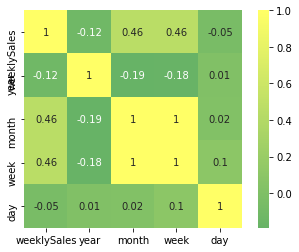

In [28]:
corr_sd = sd[['weeklySales','year','month','week','day']].corr().round(2)
from seaborn import heatmap
heatmap(corr_sd, annot=True, center=0, square=True, cmap="summer")

Interesting, weekly sales were more related to months and weeks for selected randomly sample 7_11.
Will try to predict model by fitting Store, Dept, Month, Week, Size. 

In [29]:
#Some interesting founds
holiday_true = dataset.loc[dataset['isHoliday'] == True]
holiday_false = dataset.loc[dataset['isHoliday'] == False]

In [30]:
holiday_true.groupby('year')['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'].mean()

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
year,,,,,
2010,NaN,NaN,NaN,NaN,NaN
2011,2353.006017,23028.541257,31125.177366,414.220335,2274.707128
2012,10133.674200,2635.330545,76.092147,6338.066035,4810.641736


In [31]:
holiday_false.groupby('year')['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'].mean()

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
year,,,,,
2010,NaN,NaN,NaN,NaN,NaN
2011,5269.225350,2132.272878,1060.363054,1926.290107,7773.935548
2012,7635.265154,2326.957127,55.167563,3593.238622,4271.549567


Not all of non-holiday markdowns were larger than holiday markdowns, especially for 2011. 
Even non-holiday, you can find good deals as well.